In [1]:
import pald

from sklearn.datasets import fetch_openml
from sklearn.metrics import adjusted_rand_score as ari
import matplotlib.pyplot as plt

import numpy as np
from tqdm import tqdm

In [2]:
%%time
data, labels = fetch_openml('Devnagari-Script', version=1, return_X_y=True)

CPU times: user 4.64 s, sys: 604 ms, total: 5.24 s
Wall time: 6.48 s


In [3]:
ks = np.arange(50, 150, 5)
ks.shape

(20,)

In [4]:
predictions = np.empty((len(ks), data.shape[0]), dtype="int32")

In [5]:
for i in tqdm(range(len(ks))):
    predict = pald.PAKNNLD(n_neighbors=ks[i]).fit_predict(data)
    predictions[i, :] = predict

100%|██████████| 20/20 [1:36:33<00:00, 289.69s/it]


In [7]:
predictions.shape

(20, 92000)

In [9]:
aris = np.empty(20, dtype="float64")
for i in range(len(ks)):
    aris[i] = ari(predictions[i, :], labels)

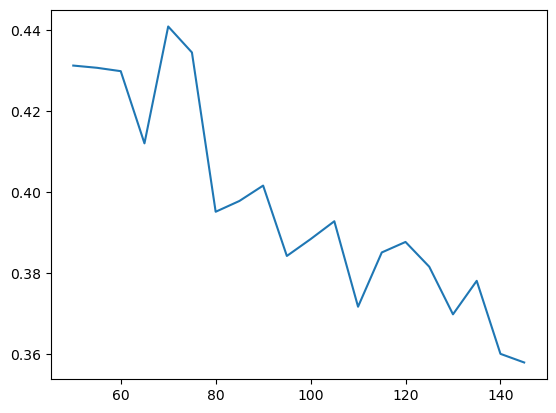

In [11]:
plt.plot(ks, aris)